¡ Hola Diego! Como te va?

Mi nombre es Facundo Lozano! Ya he tenido el agrado de revisar otros proyectos tuyos, nuevamente seré tu revisor en este proyecto.

Como siempre, a continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: no los mueva, modifique ni elimine.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:


<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

Este proyecto tiene como objetivo predecir la salida de clientes (churn) de Beta Bank utilizando un modelo de aprendizaje supervisado. Por lo que crearemos un algoritmo de ML utilizando python y la librería Scikit Learn, como condicion este modelo necesita un valor F1 de al menos 0.59.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Diego, como siempre, me tomo este tiempo al inicio del proyecto para comentar mis apreciaciones generales de esta primera iteración de la entrega. 

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente siempre me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programando ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser mejor como Data Scientist"
    
Ahora si yendo a esta notebook. Diego, lo he dicho al final del proyecto pero lo resalto aquí nuevamente, tu proyecto está muy bien resuelto, resalta capacidad y comprensión de todas las herramientas, como a la vez esta ordenado y es sencillo de seguir junto a agregados fantasticos, felictiaciones!

Este proyecto está en condiciones de ser aprobado! Éxitos dentro de tu camino en el mundo de los datos!

Saludos Diego!

1. Cargar y preparar el dataset

In [28]:
import pandas as pd

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, roc_auc_score

# algoritmos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Cargar el dataset
file_path = '/datasets/Churn.csv'
churn_df = pd.read_csv(file_path)

In [3]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente Diego! Hasta aquí hemos importado correctamente las librerías manteniendolas por separado de la carga de los datos y tamibién hemos implementado métodos para la comprensión de la composición de nuestros datos, bien hecho!

In [4]:
# Eliminar columnas innecesarias
df = churn_df.drop(['RowNumber', 'CustomerId'], axis=1)

In [5]:
df.shape

(10000, 12)

In [6]:
# Comprobar si hay valores nulos
df.isnull().sum()


Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)

In [8]:
# control duplicados
df.duplicated().sum()

0

In [9]:
# Información general sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  float64
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.6+ KB


In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Una gran cantidad de pasos aquí, excelente al quitar aquellas features que no aportan valor, por otro lado excelente corroboración de nulos y relleno de los mismos en este caso mediante la media, felicitaciones!

In [11]:
# Codificar variables categóricas
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Transformaciones de las features categóricas a numéricas perfectamente!

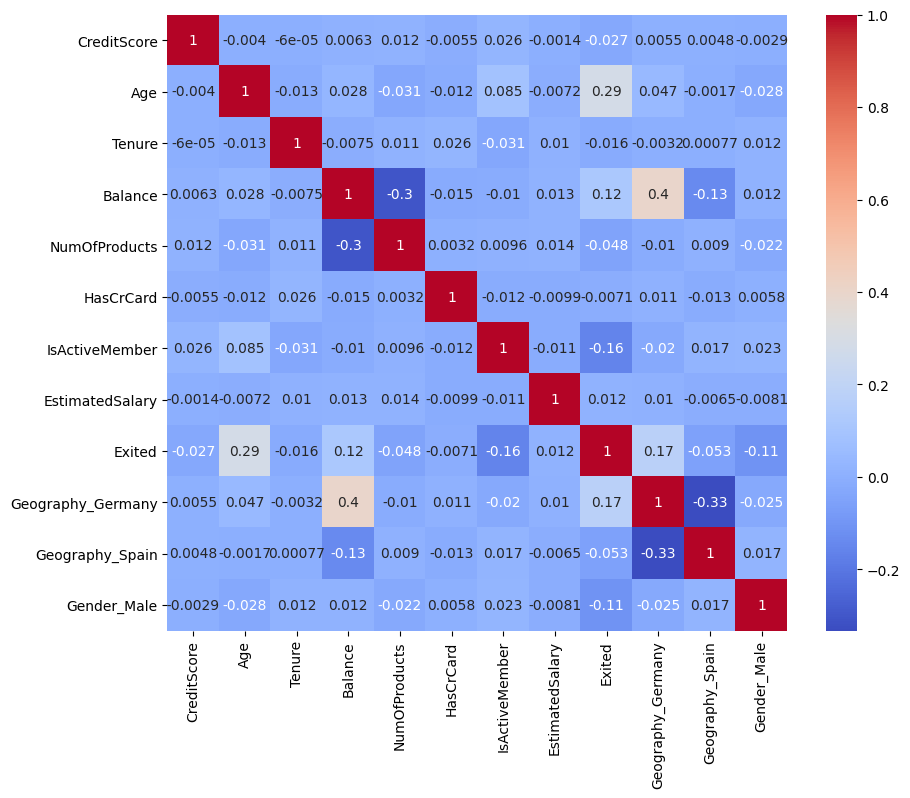

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Distribución de la variable objetivo 'Exited'
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

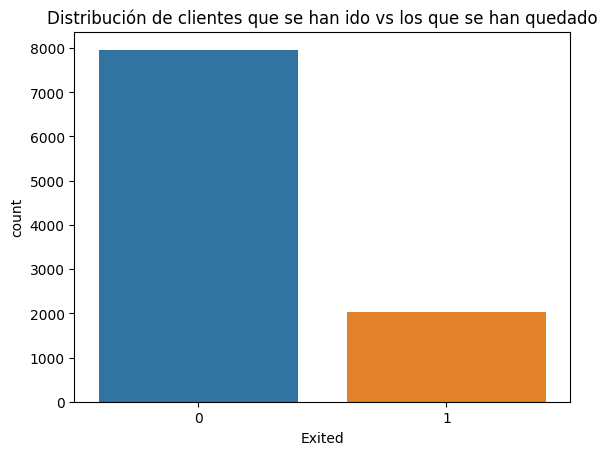

In [14]:
sns.countplot(x='Exited', data=df)
plt.title('Distribución de clientes que se han ido vs los que se han quedado')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Tanto el análisis de correlaciones entre las features como el análisis del desbalanceo de la target es perfecto! Sigamos!

2. Entrenar el modelo

In [15]:
# Separar características y la variable objetivo
X = df.drop(['Exited', 'Surname'], axis=1)
y = df['Exited']

In [19]:
# Dividir en entrenamiento (60%), validación (20%) y prueba (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print('x_train_full size',X_train_full.shape)
print('y_train_full size',y_train_full.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)
print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_val size',X_val.shape)
print('y_val size',y_val.shape)

x_train_full size (8000, 11)
y_train_full size (8000,)
x_test size (2000, 11)
y_test size (2000,)
x_train size (6000, 11)
y_train size (6000,)
x_val size (2000, 11)
y_val size (2000,)


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

División de los datos perfecta en los 3 grupos correspondientes!

In [20]:
# Entrenar el modelo sin corrección de desequilibrio
model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred_base = model_base.predict(X_val)

# Calcular F1 y AUC-ROC
f1_base = f1_score(y_val, y_val_pred_base)
roc_auc_base = roc_auc_score(y_val, model_base.predict_proba(X_val)[:, 1])

print(f'F1 Score (sin corrección): {f1_base}')
print(f'AUC-ROC (sin corrección): {roc_auc_base}')

F1 Score (sin corrección): 0.5988023952095808
AUC-ROC (sin corrección): 0.8573595084761019


In [30]:
# Entrenar el modelo sin corrección de desequilibrio
model_base = LogisticRegression(random_state=42)
model_base.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred_base = model_base.predict(X_val)

# Calcular F1 y AUC-ROC
f1_base = f1_score(y_val, y_val_pred_base)
roc_auc_base = roc_auc_score(y_val, model_base.predict_proba(X_val)[:, 1])

print(f'F1 Score (sin corrección): {f1_base}')
print(f'AUC-ROC (sin corrección): {roc_auc_base}')

F1 Score (sin corrección): 0.10460251046025104
AUC-ROC (sin corrección): 0.6787991413283778


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Declaraciones de los modelos bien hechas como a la vez la elección de métricas para comprender el desempeño de los mismos!

In [22]:
#Enfoque sobremuestreo y submuestreo
from sklearn.utils import resample

# Combinar X_train y y_train en un único DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Separar las clases mayoritaria y minoritaria
class_major = train_data[train_data['Exited'] == 0]
class_minor = train_data[train_data['Exited'] == 1]

# Aplicar sobremuestreo a la clase minoritaria
class_minor_oversampled = resample(class_minor, 
                                         replace=True,    # Sobremuestrear con reemplazo
                                         n_samples=len(class_major), # Igualar el número de muestras a la clase mayoritaria
                                         random_state=42)  # Fijar la semilla para reproducibilidad

# Combinar ambas clases
train_data_oversampled = pd.concat([class_major, class_minor_oversampled])

# Separar las características y el objetivo nuevamente
X_train_oversampled = train_data_oversampled.drop('Exited', axis=1)
y_train_oversampled = train_data_oversampled['Exited']

# Entrenar el modelo con datos sobremuestreados
model_oversampled = RandomForestClassifier(random_state=42)
model_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Evaluar en el conjunto de validación
y_val_pred_oversampled = model_oversampled.predict(X_val)

# Calcular F1 y AUC-ROC
f1_oversampled = f1_score(y_val, y_val_pred_oversampled)
roc_auc_oversampled = roc_auc_score(y_val, model_oversampled.predict_proba(X_val)[:, 1])

print(f'F1 Score (Oversampling): {f1_oversampled}')
print(f'AUC-ROC (Oversampling): {roc_auc_oversampled}')

F1 Score (Oversampling): 0.6061415220293725
AUC-ROC (Oversampling): 0.8596030703460776


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Y tal como debíamos hemos implementado dos métodos para mitigar el desbalanceo como el sobremuestreo y submuestreo, claramente una mejora de los resultados! Impresionante!

In [26]:
print(f'Comparación de resultados:')
print(f'F1 Score sin corrección: {f1_base}, AUC-ROC sin corrección: {roc_auc_base}')
print(f'F1 Score con Oversampling: {f1_oversampled}, AUC-ROC con Oversampling: {roc_auc_oversampled}')


Comparación de resultados:
F1 Score sin corrección: 0.5988023952095808, AUC-ROC sin corrección: 0.8573595084761019
F1 Score con Oversampling: 0.6061415220293725, AUC-ROC con Oversampling: 0.8596030703460776


In [31]:
# Entrenar Regresión Logística con sobremuestreo
model_lr_oversampled = LogisticRegression(random_state=42, max_iter=1000)
model_lr_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Evaluar el modelo en el conjunto de validación
y_val_pred_lr_oversampled = model_lr_oversampled.predict(X_val)

# Calcular F1 y AUC-ROC
f1_lr_oversampled = f1_score(y_val, y_val_pred_lr_oversampled)
roc_auc_lr_oversampled = roc_auc_score(y_val, model_lr_oversampled.predict_proba(X_val)[:, 1])

print(f'F1 Score (Logistic Regression Sobremuestreo): {f1_lr_oversampled}')
print(f'AUC-ROC (Logistic Regression Sobremuestreo): {roc_auc_lr_oversampled}')

F1 Score (Logistic Regression Sobremuestreo): 0.45792880258899676
AUC-ROC (Logistic Regression Sobremuestreo): 0.71324060045985


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Y tal como se debía hemos hecho la predicción final sobre el tercer conjunto, un trabajo conciso y perfecto!